## Social Media Analytics

## Text Mining Best Buy Project


##### Felix Funes 20220306 | Paula Catalan 20221048 | Efstathia Styliagkatzi 20220078 | Alisson Tapia 20221156 | S M Abrar Hossain Asif 20220223


After extracting the necessary data we believe was relevant for the purpose of this project.  It is time for data preprocessing which involves cleaning and transforming the data obtained from best buy web pages before it can be analyzed.


Some of the importan reason of pre-process our data are:

*  Data Quality: Web pages are often unstructured, messy and noisy, which makes it challenging to extract clean and accurate data. Data preprocessing helps to clean and filter out irrelevant or inaccurate data, so that only the useful information is retained.

*  Data Consistency: Data from web pages can come in different formats, with varying levels of detail and granularity. Data preprocessing helps to standardize the data format, so that it can be easily compared and analyzed across different web pages.

* Data Integration: Data collected from web scraping is often stored in different formats or data sources, which makes it difficult to combine and integrate. Data preprocessing helps to transform and merge the data into a consistent format that can be easily combined and integrated with other data sources.

*  Efficiency: Preprocessing can also help to optimize the data processing pipeline by reducing the amount of data that needs to be processed, and by optimizing the data format for efficient storage and retrieval.

* Accuracy: Preprocessing can also help to reduce errors and inconsistencies that can arise from incomplete, missing or incorrect data, which can lead to inaccurate analysis and decision-making.




In [42]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import csv
import pandas as pd
!pip install plotly
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import nltk 
from bs4 import BeautifulSoup
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from rake_nltk import Rake
from sklearn.feature_extraction.text import CountVectorizer



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
# Load dataset
dtypes = {'device':'category','user':'category','rating':'integer','ownership_lenght':'category'}
reviews_to_clean = pd.read_excel("ExtractedReviewsDataCollection_bestbuy.xlsx", sheet_name="Sheet1", index_col = 0 , engine='openpyxl')


* This dataset is the one we extrated from the data collection notebook. Where we chose 8 url that sells iphone 14 in the website best buy. 

In [44]:
# Check first rows
reviews_to_clean.head()

,device,user,rating,text,date,ownership_length
0,Apple - iPhone 14 128GB - Midnight (Verizon),BigG,5,Apple makes the best cellphone on the market h...,2023-02-03,less than 1 week
1,Apple - iPhone 14 128GB - Midnight (Verizon),Jp44087,5,"Ease of use, good battery life, 128gb fits me ...",2023-02-03,3 weeks
2,Apple - iPhone 14 128GB - Midnight (Verizon),GamerDadLife,5,Love it works great and the red color is the m...,2022-12-24,2 weeks
3,Apple - iPhone 14 128GB - Midnight (Verizon),LevanaP,5,Been a long time iPhone user. This is a awesom...,2023-04-14,1 week
4,Apple - iPhone 14 128GB - Midnight (Verizon),Anonymous,5,My wife dropped her phone right AFTER the Appl...,2023-04-15,3 weeks


* Before cleaning all the data. First we should see what it contains. We can see we have 6 columns.

In [45]:
# View text of review 
reviews = reviews_to_clean['text']

# print the first 5 reviews for verification purposes
print("All review:\n", reviews[:])

All review:
 0      Apple makes the best cellphone on the market h...
1      Ease of use, good battery life, 128gb fits me ...
2      Love it works great and the red color is the m...
3      Been a long time iPhone user. This is a awesom...
4      My wife dropped her phone right AFTER the Appl...
                             ...                        
369    Value for the $$$. Security a headache. It is ...
370    My mom got this and she loves this phone the n...
371    I loved it because the camra looks great abd d...
372    I went into the store with my wife and child t...
373    The camera did not work and I had to get a rep...
Name: text, Length: 374, dtype: object


### Fuctions

In [46]:
# Text preprocessing
def textPreProcess(rawtext, removeHTML=True, charsToRemove = r'\?|\.|\!|\;|\.|\"|\,|\(|\)|\&|\:|\-', removeNumbers=True, removeLineBreaks=False, specialCharsToRemove = r'[^\x00-\xfd]', convertToLower=True, removeConsecutiveSpaces=True):
    if type(rawtext) != str:
        return rawtext
    procText = rawtext
        
    # Remove HTML
    if removeHTML:
        procText = BeautifulSoup(procText,'html.parser').get_text()
        
    #Remove links
    if removeHTML:
        procText = BeautifulSoup(procText,'html.parser').get_text()

    # Remove punctuation and other special characters
    if len(charsToRemove)>0:
        procText = re.sub(charsToRemove,' ',procText)

    # Remove numbers
    if removeNumbers:
        procText = re.sub(r'\d+',' ',procText)

    # Remove line breaks
    if removeLineBreaks:
        procText = procText.replace('\n',' ').replace('\r', '')

    # Remove special characters
    if len(specialCharsToRemove)>0:
        procText = re.sub(specialCharsToRemove,' ',procText)

    # Normalize to lower case
    if convertToLower:
        procText = procText.lower() 
        
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(procText)
    filtered_text = [w for w in word_tokens if not w in stop_words]
    procText = ' '.join(filtered_text)

    # Replace multiple consecutive spaces with just one space
    if removeConsecutiveSpaces:
        procText = re.sub(' +', ' ', procText)

    return procText

In [47]:
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define function to tokenize and lemmatize words
def tokenize_words(text):
    if (type(text) != str) or (word_tokenize(text) == ''):
        return np.nan
    else:
        # Tokenize words
        words = word_tokenize(text)
        
        # Lemmatize words
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        
        return lemmatized_words


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
# Function to create text from words
def recreateText(words):
    if type(words) == list:
        temp_str = (' ').join(words)
        return temp_str
    else:
        return np.nan

### Analysis

In [49]:
# Create a dataframe with only the description
processedReviews = pd.DataFrame(data=reviews_to_clean.text.apply(textPreProcess,charsToRemove ='', removeNumbers=False).values, index=reviews_to_clean.index, columns=['PreProcessedText'])

C:\Users\madel\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [50]:
print(processedReviews[0:10])

                                    PreProcessedText
0            apple makes best cellphone market hands
1     ease use , good battery life , 128gb fits fine
2  love works great red color gorgeous iphone col...
3  long time iphone user . awesome phone . full s...
4  wife dropped phone right apple protect plan ex...
5  perfect iphone ! thing amazing anyone family !...
6  going purchase iphones verizon stopped best bu...
7  far , good . used android since got cellphone ...
8  phone pretty - n't like shutting screen side b...
9  long overdue upgrade iphone 7 14. totally wort...


In [51]:
reviews_to_clean['processedReviews'] = reviews_to_clean['text'].apply(textPreProcess)

C:\Users\madel\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [52]:
import plotly.offline as pyo
import plotly.graph_objs as go

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(reviews_to_clean['processedReviews'], 20)

df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
data = [go.Bar(x=df1['text'], y=df1['count'], name='Top 20 bigrams', marker=dict(color='black'))]
layout = go.Layout(title='Top 20 bigrams', yaxis=dict(title='Count'))

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)


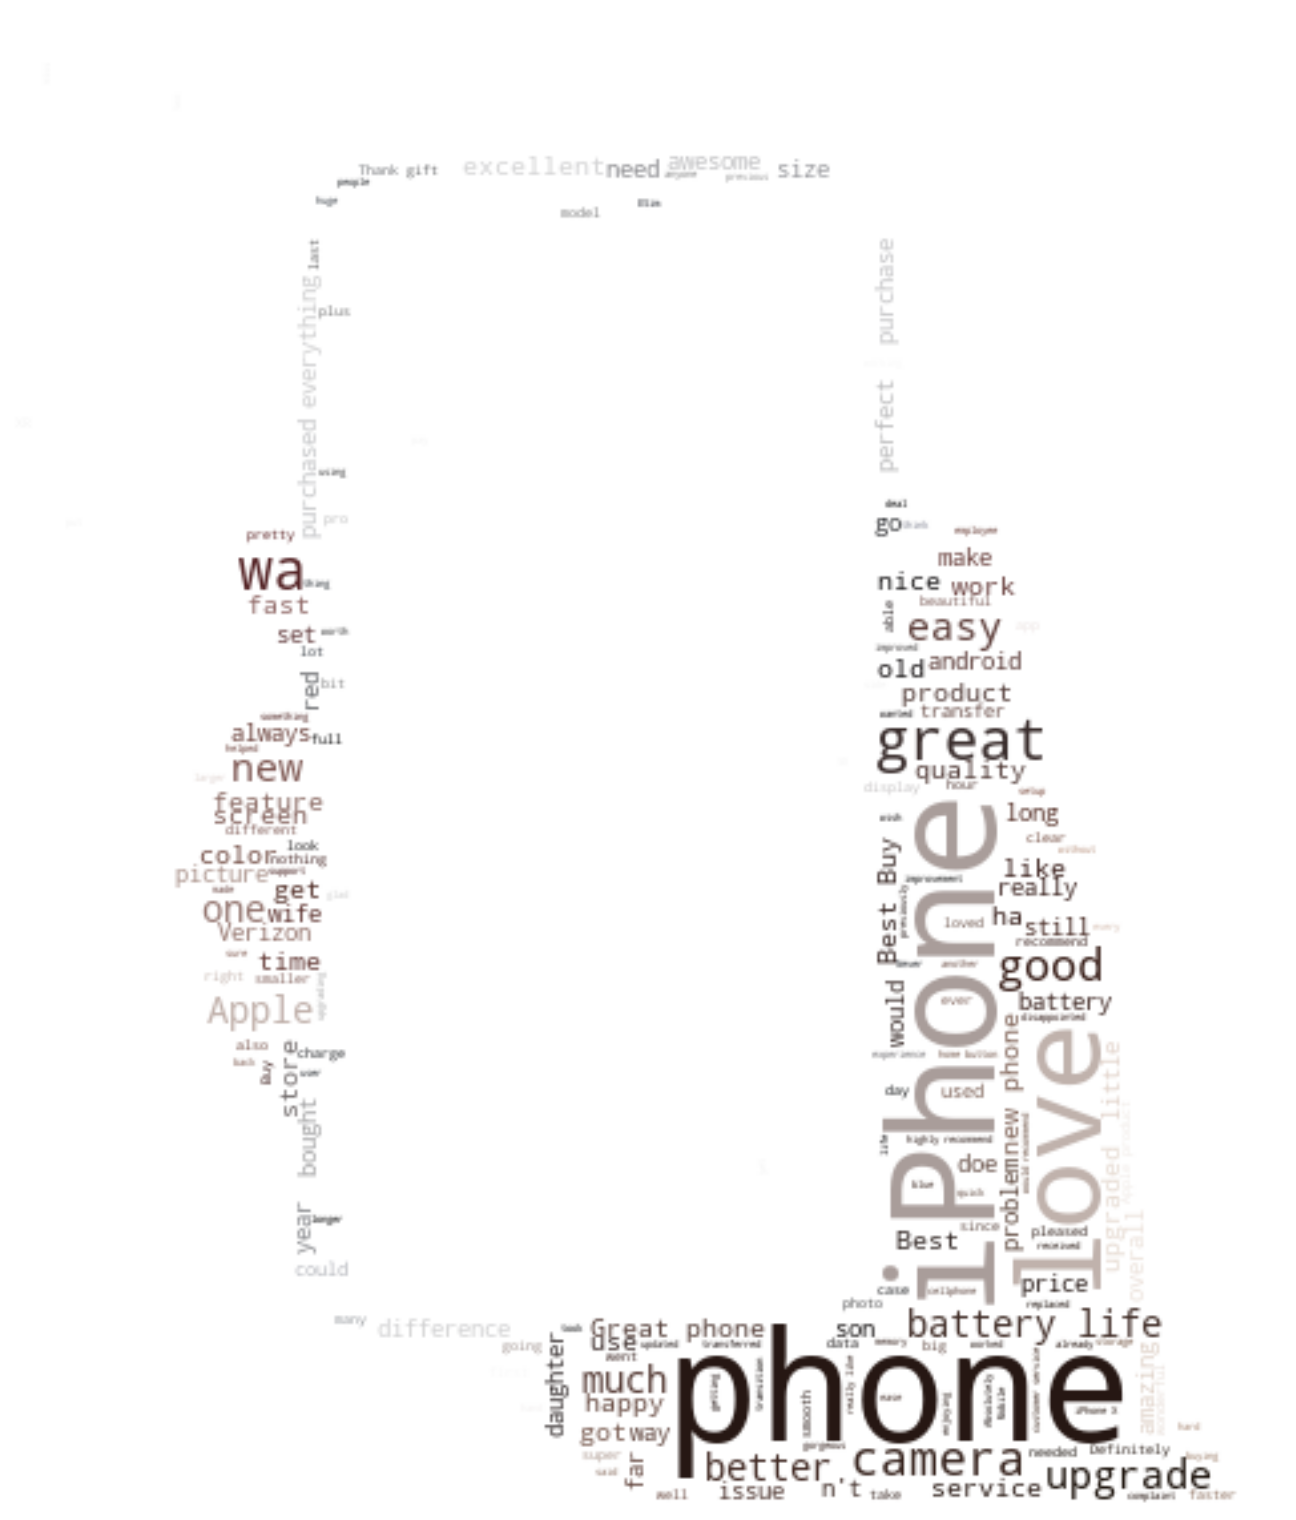

In [66]:
import itertools
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


# Tokenize and lemmatize words
reviews_to_clean['processedReviews'] = reviews_to_clean['text'].apply(tokenize_words)

# Join all words into a single string
all_words_lem = ' '.join(list(itertools.chain.from_iterable(reviews_to_clean['processedReviews'])))

# Generate word cloud
mask = np.array(Image.open("iphone4_mano.png"))
stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(height=2000,
                              width=2000,
                              background_color="white",
                              mode="RGBA",
                              stopwords=stop_words,
                              mask=mask).generate(all_words_lem)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")

plt.show()

In [54]:
# Remove rows with empty text
processedReviews.PreProcessedText = processedReviews.PreProcessedText.str.strip()
processedReviews = processedReviews[processedReviews.PreProcessedText != '']

In [55]:
# Find specific terms
termsToSearch = ['color', 'batery', 'good', 'quality', 'storage']
searchList =  re.compile('|'.join(termsToSearch))

# Get words from sentences
listOfWords =  processedReviews.PreProcessedText.apply(tokenize_words)

# Reconstruct sentences with spaces in the beginning and in the end
ppText = listOfWords.apply(recreateText)

# Look for search terms in sentences and present them
ppText_searched=[]
for review in ppText:
    if searchList.search(' '+ review +' '):
        ppText_searched.append(review)

In [56]:
# The first 3 reviews
ppText_searched[0:5]

['ease use , good battery life , 128gb fit fine',
 'love work great red color gorgeous iphone color ever',
 'far , good . used android since got cellphone 30 year ago . difference ! ! easy learn use senior population member . highly recommend . afraid smaller keyboard . problem ! !',
 'always love apple product phone disappoint . color gorgeous , display crisp clear ! great upgrade camera well .',
 'needed upgrade , went iphone , price reasonable really like color .']

In [57]:
# RAKE method - in English
r = Rake(language='english')

In [58]:
# Keywords extraction per review
r.extract_keywords_from_sentences(processedReviews['PreProcessedText'])
r.get_ranked_phrases()

['color blue midnight exchange first phone volume kept going second one got hot hope third one good last exchange made september 27',
 'basically aggressively keeping third parties repairing phones tablets make coast much repair phone breaks buy new one',
 'spend lot money new phone box apple bothered send charger irritating phone requires juice charge quickly',
 'one bestbuy sells persons walked us thru process gave us excellent advice tips new phone',
 'like shutting screen side buttons side get pressed together trying press one picture taken',
 'overall think great phone purchase looking durable sustainable upgrade think worth extra hundred dollars 13',
 'minnesota best buy phones department beyond rude unhelpful talking time another employee nothing work',
 'able set sim card virtually physical transfer phone makes carrying carriers phone phone much easier',
 'one peek combo literally capture breath turn tracks charge bestbuy get one',
 'may go back screen protector large bubble wh